In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import pickle                                  #one type of file format
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, LeaveOneOut,\
RepeatedKFold, train_test_split

reason we split our data into training and test sets is that we are inter‐
ested in measuring how well our model generalizes to new, previously unseen data.
We are not interested in how well our model fit the training set, but rather in how
well it can make predictions for data that was not observed during training

In [3]:
# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [7]:
X[:3]

array([[2.63185834, 0.6893649 ],
       [0.08080352, 4.69068983],
       [3.00251949, 0.74265357]])

In [8]:
y[:3]

array([1, 0, 1])

In [ ]:
# df = pd.DataFrame(X)
df['y'] =y
df.head()

In [16]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test, y_test)

0.88

# Cross-Validation

In [19]:
df.columns = ['A','B','y']
df

,A,B,y
0,2.631858,0.689365,1
1,0.080804,4.690690,0
2,3.002519,0.742654,1
3,-0.637628,4.091047,0
4,-0.072283,2.883769,0
...,...,...,...
95,-0.338874,3.234825,2
96,1.289338,3.449692,0
97,1.840706,3.561622,0
98,-0.901673,1.315825,2


In [37]:
X = df[['A','B']]
y = df['y']
len(X)

100

In [36]:
len(y)

100

In [33]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, LeaveOneOut,\
RepeatedKFold, train_test_split

In [34]:
kf = KFold(n_splits= 5)

In [35]:
for i ,j in kf.split(X):  #i train_df,   j test_df
    print(len(i))
    print(i)
    print(len(j))
    print(j)


80
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99]
20
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
80
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99]
20
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
80
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99]
20
[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
80
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 

Cross-validation is implemented in scikit-learn using the cross_val_score func‐
tion from the model_selection module.

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [11]:
iris = load_iris()
logreg = LogisticRegression()
score = cross_val_score(logreg, iris.data, iris.target,  cv=5)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
np.round(score, decimals=3)

array([0.967, 1.   , 0.933, 0.967, 1.   ])

In [51]:
#A common way to summarize the cross-validation accuracy is to compute the mean
np.round(score.mean(), decimals=3)

0.973

Using the mean cross-validation we can conclude that we expect the model to be
around 97% accurate on average. 

Looking at all five scores produced by the five-fold
cross-validation, we can also conclude that there is a relatively high variance in the
accuracy between folds, ranging from 100% accuracy to 90% accuracy. 

This could
imply that the model is very dependent on the particular folds used for training, but it
could also just be a consequence of the small size of the dataset.

the model needs to generalize well to all of the samples in the dataset for all of the
cross-validation scores (and their mean) to be high.


Having multiple splits of the data also provides some information about how sensi‐
tive our model is to the selection of the training dataset. For the iris dataset, we saw
accuracies between 90% and 100%. This is quite a range, and it provides us with an
idea about how the model might perform in the worst case and best case scenarios
when applied to new data.

 main disadvantage of cross-validation is increased computational cost
    
the purpose of cross-validation is
only to evaluate how well a given algorithm will generalize when
trained on a specific dataset.

In [ ]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
 cross_val_score(logreg, iris.data, iris.target, cv=kfold)))


# stratified k-fold cross-validation

As the simple k-fold strategy fails here, scikit-learn does not use it for classifica‐
tion, but rather uses stratified k-fold cross-validation. In stratified cross-validation, we
split the data such that the proportions between classes are the same in each fold as
they are in the whole dataset, as illustrated in

It is usually a good idea to use stratified k-fold cross-validation instead of k-fold
cross-validation to evaluate a classifier, because it results in more reliable estimates of
generalization performance.

In [58]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
score = cross_val_score(logreg, iris.data, iris.target,  cv=skf)
score

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [61]:
np.round(score.mean(),decimals=3)

0.973

# Leave-one-out cross-validation


Another frequently used cross-validation method is leave-one-out. You can think of
leave-one-out cross-validation as k-fold cross-validation where each fold is a single
sample. For each split, you pick a single data point to be the test set. This can be very
time consuming, particularly for large datasets, but sometimes provides better esti‐
mates on small datasets:

In [62]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Number of cv iterations:  150
Mean accuracy: 0.97


In [63]:
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


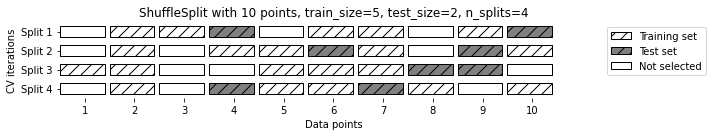

In [3]:
import mglearn
mglearn.plots.plot_shuffle_split()

In [67]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Cross-validation scores:
[0.98666667 0.96       0.98666667 0.93333333 0.97333333 0.97333333
 0.94666667 0.94666667 0.94666667 0.98666667]


which can sometimes be helpful. It also allows
for using only part of the data in each iteration, by providing train_size and
test_size settings that don’t add up to one. Subsampling the data in this way can be
useful for experimenting with large datasets

# GroupKFold

In [70]:
from sklearn.model_selection import GroupKFold
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))


Cross-validation scores:
[0.75       0.6        0.66666667]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [71]:
mglearn.plots.plot_label_kfold()

AttributeError: module 'mglearn.plots' has no attribute 'plot_label_kfold'

# Grid Search


In [ ]:
#use to findout best parameter set

The Danger of Overfitting the Parameters and the Validation Set
Given this result, we might be tempted to report that we found a model that performs
with 97% accuracy on our dataset. However, this claim could be overly optimistic (or
just wrong), for the following reason: 


we tried many different parameters and
    selected the one with best accuracy on the test set, but this accuracy won’t necessarily
carry over to new data. Because we used the test data to adjust the parameters, we can
no longer use it to assess how good the model is. This is the same reason we needed
to split the data into training and test sets in the first place; we need an independent
dataset to evaluate, one that was not used to create the model.


One way to resolve this problem is to split the data again, so we have three sets: the
training set to build the model, the validation (or development) set to select the
parameters of the model, and the test set to evaluate the performance of the selected
parameters.

The distinction between the training set, validation set, and test set is fundamentally
important to applying machine learning methods in practice. Any choices made
based on the test set accuracy “leak” information from the test set into the model.

Therefore, it is important to keep a separate test set, which is only used for the final
evaluation. It is good practice to do all exploratory analysis and model selection using
the combination of a training and a validation set, and reserve the test set for a final
evaluation—this is even true for exploratory visualization. Strictly speaking, evaluat‐
ing more than one model on the test set and choosing the better of the two will result
in an overly optimistic estimate of how accurate the model is.

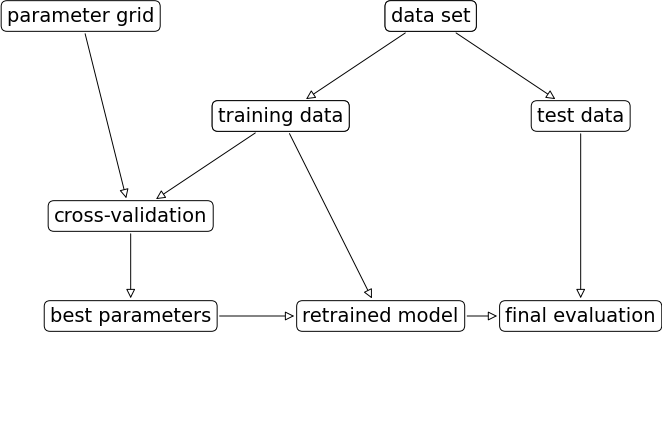

In [5]:

mglearn.plots.plot_grid_search_overview()


In [6]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))


Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

NameError: name 'param_grid' is not defined

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
 iris.data, iris.target, random_state=0)


The grid_search object that we created behaves just like a classifier; we can call the
standard methods fit, predict, and score on it.1
 However, when we call fit, it will
run cross-validation for each combination of parameters we specified in param_grid:


In [13]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

Fitting the GridSearchCV object not only searches for the best parameters, but also
automatically fits a new model on the whole training dataset with the parameters that
yielded the best cross-validation performance.

In [14]:
grid_search.score(X_test, y_test)

0.9736842105263158

In [15]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [16]:
grid_search.best_score_

0.9731225296442687

Again, be careful not to confuse best_score_ with the generaliza‐
tion performance of the model as computed by the score method
on the test set. Using the score method (or evaluating the output of
the predict method) employs a model trained on the whole train‐
ing set. The best_score_ attribute stores the mean cross-validation
accuracy, with cross-validation performed on the training set

In [17]:
grid_search.best_estimator_

SVC(C=10, gamma=0.1)

As grid searches
are quite computationally expensive to run, often it is a good idea to start with a rela‐
tively coarse and small grid. We can then inspect the results of the cross-validated
grid search, and possibly expand our search. The results of a grid search can be found
in the cv_results_ attribute, 

In [18]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008400,0.010802,0.001800,0.000399,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.003600,0.000490,0.001800,0.000748,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.003799,0.000400,0.002201,0.000400,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.007400,0.006346,0.002599,0.001194,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.002401,0.000489,0.001600,0.000489,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


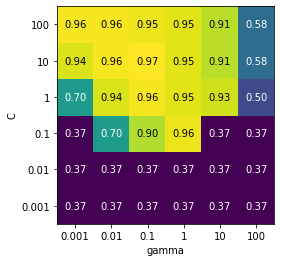

In [19]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
 ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

# Evaluation Metrics and Scoring


In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
df = pd.DataFrame(digits.data)

In [7]:
df['target'] = digits.target

In [8]:
df.columns = digits.feature_names+ ["target"]
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [9]:
digits.data[0].shape

(64,)

In [10]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, y, random_state=0)


In [11]:
df.target.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [12]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))


Unique predicted labels: [False]
Test score: 0.90


In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))


logreg score: 0.98


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


This makes it very
hard to judge which of these results is actually helpful.
we use confusion metrices

In [15]:
from sklearn import metrics
metrics.confusion_matrix(y_test,pred_logreg)


array([[402,   1],
       [  6,  41]], dtype=int64)

In [53]:
443/450   #score

0.9844444444444445

Relation to accuracy. We already saw one way to summarize the result in the confu‐
sion matrix—by computing accuracy, which can be expressed as:
Accuracy = TP+TN/TP+TN + FP + FN

accuracy is the number of correct predictions (TP and TN) divided
by the number of all samples (all entries of the confusion matrix summed up).


In [16]:
af =pd.DataFrame(metrics.confusion_matrix(y_test,pred_logreg))

In [17]:
af['prd'] = af[0]+af[1]
af

,0,1,prd
0,402,1,403
1,6,41,47


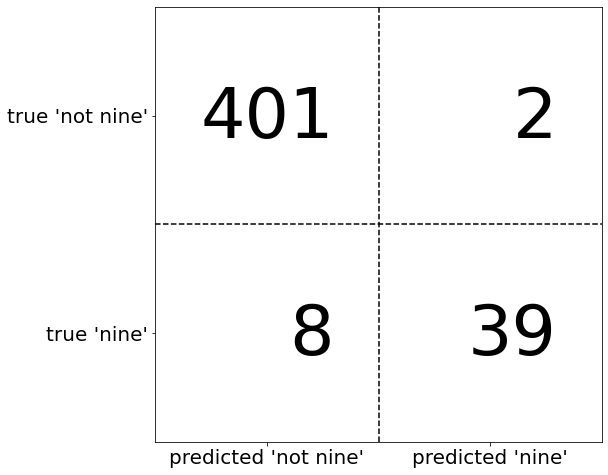

In [23]:
import mglearn
mglearn.plots.plot_confusion_matrix_illustration()

In [24]:
from sklearn.metrics import confusion_matrix
#comparisioln of diff model using confusion metrics
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
#print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))


Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


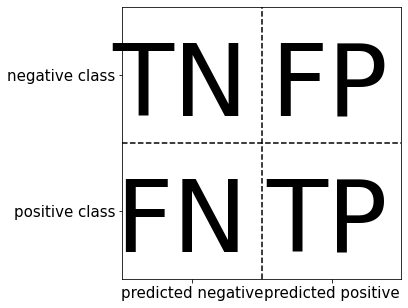

In [60]:
plt.figure(figsize=(5,5))
mglearn.plots.plot_binary_confusion_matrix()

Precision measures
how many of the samples predicted as positive are actually positive:
    
    Precision = TP/TP+FP
    goal is to limit the number of
false positives.
Precision is also known as positive predictive value (PPV)

Recall,  measures how many of the positive samples are captured
by the positive predictions:

Recall = TP/TP+FN

r recall are sensitivity, hit rate, or true positive rate (TPR).

There is a trade-off between optimizing recall and optimizing precision.


f-score or f-measure, which is with the harmonic mean of precision and recall:

F = 2 · precision·recall/precision+recall
it can be a better measure than accuracy on imbalanced binary classifi‐
cation datasets. 

In [25]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(
 f1_score(y_test, pred_most_frequent)))
#print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
 f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score tree: 0.55
f1 score logistic regression: 0.92


 Using the f-score for evaluation, we summarized the predictive per‐
formance again in one number. However, the f-score seems to capture our intuition
of what makes a good model much better than accuracy did. A disadvantage of the
f-score, however, is that it is harder to interpret and explain than accuracy.
If we want a more comprehensive summary of precision, recall, and f1
-score, we can


use the classification_report convenience function to compute all three at once,
and print them in a nice format:

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg,
 target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



 the support of each class, which simply means
the number of samples in this class according to the ground truth.

The last row in the classification report shows a weighted (by the number of samples
in the class) average of the numbers for each class


# Taking uncertainty into account


The confusion matrix and the classification report provide a very detailed analysis of
a particular set of predictions. 

However, the predictions themselves already threw
away a lot of information that is contained in the model. 

most classifiers provide 
1.a decision_function or 
2.a predict_proba method to
assess degrees of certainty about predictions. 

Making predictions can be seen as
thresholding the output of

decision_function or predict_proba at a certain fixed
point—in binary classification we use 0 for the decision function and 0.5 for
predict_proba.

In [38]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],
 random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

In [49]:
df = pd.DataFrame(X)
df['y'] = y
df.head()

,0,1,y
0,-11.312332,-1.209185,0
1,3.633774,2.589526,0
2,-2.035025,3.382277,0
3,-5.913327,12.578350,0
4,-15.525774,-9.001016,0


In [51]:
df.y.value_counts()

0    400
1     50
Name: y, dtype: int64

In [64]:
metrics.confusion_matrix(y_test, svc.predict(X_test))

array([[93, 11],
       [ 3,  6]], dtype=int64)

In [65]:
svc.classes_

array([0, 1])

In [39]:
print(classification_report(y_test, svc.predict(X_test)))


              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



For class 1, we get a fairly small recall, and precision is mixed. Because class 0 is so
much larger, the classifier focuses on getting class 0 right, and not the smaller class 1.
Let’s assume in our application it is more important to have a high recall for class 1, as
in the cancer screening example earlier. This means we are willing to risk more false
positives (false class 1) in exchange for more true positives (which will increase the
recall). The predictions generated by svc.predict really do not fulfill this require‐
ment, but we can adjust the predictions to focus on a higher recall of class 1 by
changing the decision threshold away from 0.

By default, points with a deci
sion_function value greater than 0 will be classified as class 1. We want more points
to be classified as class 1, so we need to decrease the threshold

In [40]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [ ]:
# print(classification_report(y_test, y_pred_lower_threshold))

Picking a threshold for models that implement the predict_proba method can be
easier, as the output of predict_proba is on a fixed 0 to 1 scale, and models probabil‐
ities. By default, the threshold of 0.5 means that if the model is more than 50% “sure”
that a point is of the positive class, it will be classified as such. Increasing the thresh‐
old means that the model needs to be more confident to make a positive decision
(and less confident to make a negative decision). While working with probabilities
may be more intuitive than working with arbitrary thresholds, not all models provide
realistic models of uncertainty (a DecisionTree that is grown to its full depth is
always 100% sure of its decisions, even though it might often be wrong). 

This relates
to the concept of calibration: a calibrated model is a model that provides an accurate
measure of its uncertainty. 



changing the threshold that is used to make a classification deci‐
sion in a model is a way to adjust the trade-off of precision and recall for a given clas‐
sifier. Maybe you want to miss less than 10% of positive samples, meaning a desired
recall of 90%. This decision depends on the application

2.when developing a new model, it is not entirely clear what the operating point
will be. For this reason, and to understand a modeling problem better, it is instructive
to look at all possible thresholds, or all possible trade-offs of precision and recalls at
once. This is possible using a tool called the precision-recall curve.

In [42]:
#roc
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [74]:
svc.decision_function(X_test)  #Evaluates the decision function for the samples in X.

array([-1.12256809,  0.86782231, -0.14655591, ..., -1.16165424,
       -1.11836907, -1.11553629])

In [43]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
 y_test, svc.decision_function(X_test))

The precision_recall_curve function returns a list of precision and recall values
for all possible thresholds (all values that appear in the decision function) in sorted
order, so we can plot a curve,

In [44]:
precision, recall, thresholds

(array([0.32142857, 0.2962963 , 0.30769231, 0.32      , 0.33333333,
        0.34782609, 0.36363636, 0.38095238, 0.4       , 0.36842105,
        0.33333333, 0.35294118, 0.375     , 0.4       , 0.42857143,
        0.38461538, 0.41666667, 0.45454545, 0.4       , 0.44444444,
        0.5       , 0.57142857, 0.66666667, 0.6       , 0.5       ,
        0.66666667, 0.5       , 1.        , 1.        ]),
 array([1.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
        0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.77777778,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.55555556, 0.55555556, 0.55555556, 0.44444444, 0.44444444,
        0.44444444, 0.44444444, 0.44444444, 0.33333333, 0.22222222,
        0.22222222, 0.11111111, 0.11111111, 0.        ]),
 array([-0.7512563 , -0.58749402, -0.48739733, -0.44364565, -0.40435353,
        -0.28965335, -0.24173165, -0.19257469, -0.17852475, -0.16644845,
        -0.1601932 ,  0.08620484,  0.14630375,  0.19153373

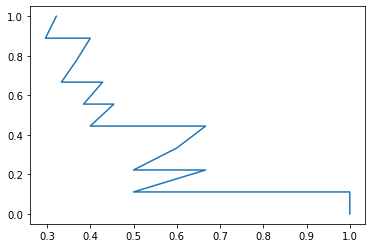

In [68]:

plt.plot(precision, recall, label="precision recall curve")

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Recall')

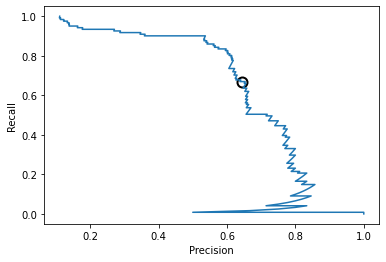

In [70]:
import matplotlib.pyplot as plt
# Use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2],
 random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
 y_test, svc.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
 label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

The black circle marks the point that corresponds to a thresh‐
old of 0, the default threshold for decision_function.

The closer a curve stays to the upper-right corner, the better the classifier.

A point at
the upper right means high precision and high recall for the same threshold



A point at
the upper right means high precision and high recall for the same threshold. The
curve starts at the top-left corner, corresponding to a very low threshold, classifying
everything as the positive class. 

Raising the threshold moves the curve toward higher
precision, but also lower recall. Raising the threshold more and more, we get to a sit‐
uation where most of the points classified as being positive are true positives, leading
to a very high precision but lower recall. The more the model keeps recall high as
precision goes up, the better

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
 y_test, rf.predict_proba(X_test)[:, 1])

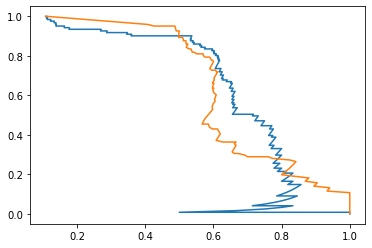

In [78]:
plt.plot(precision, recall, label="svc")
plt.plot(precision_rf, recall_rf, label="rf")

From the comparison plot we can see that the random forest performs better at the
extremes, for very high recall or very high precision requirements. Around the mid‐
dle (approximately precision=0.7), the SVM performs better. If we only looked at the
f1
-score to compare overall performance, we would have missed these subtleties. The
f1
-score only captures one point on the precision-recall curve, the one given by the
default threshold:


In [79]:
print("f1_score of random forest: {:.3f}".format(
 f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))


f1_score of random forest: 0.610
f1_score of svc: 0.656


One particular way to summarize the precision-recall curve is
by computing the integral or area under the curve of the precision-recall curve, also
known as the average precision

In [81]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))


Average precision of random forest: 0.660
Average precision of svc: 0.666


Because average precision is the
area under a curve that goes from 0 to 1, average precision always returns a value
between 0 (worst) and 1 (best). The average precision of a classifier that assigns
decision_function at random is the fraction of positive samples in the dataset.


# Receiver operating characteristics (ROC) and AUC

another tool that is commonly used to analyze the behavior of classifiers at
different thresholds: the receiver operating characteristics curve, o
    
    it shows
the false positive rate (FPR) against the true positive rate (TPR). Recall that the true
positive rate is simply another name for recall, while the false positive rate is the frac‐
tion of false positives out of all negative samples:
    
    FPR = FP/FP+TN

In [82]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

In [83]:
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 9.96015936e-04, 9.96015936e-04,
        1.99203187e-03, 1.99203187e-03, 2.98804781e-03, 2.98804781e-03,
        3.98406375e-03, 3.98406375e-03, 4.98007968e-03, 4.98007968e-03,
        5.97609562e-03, 5.97609562e-03, 6.97211155e-03, 6.97211155e-03,
        7.96812749e-03, 7.96812749e-03, 8.96414343e-03, 8.96414343e-03,
        9.96015936e-03, 9.96015936e-03, 1.19521912e-02, 1.19521912e-02,
        1.29482072e-02, 1.29482072e-02, 1.39442231e-02, 1.39442231e-02,
        1.49402390e-02, 1.49402390e-02, 1.59362550e-02, 1.59362550e-02,
        1.89243028e-02, 1.89243028e-02, 2.19123506e-02, 2.19123506e-02,
        2.39043825e-02, 2.39043825e-02, 3.18725100e-02, 3.18725100e-02,
        3.38645418e-02, 3.38645418e-02, 3.48605578e-02, 3.48605578e-02,
        3.58565737e-02, 3.58565737e-02, 3.68525896e-02, 3.68525896e-02,
        3.78486056e-02, 3.78486056e-02, 3.98406375e-02, 3.98406375e-02,
        4.18326693e-02, 4.18326693e-02, 4.28286853e-02, 4.282868

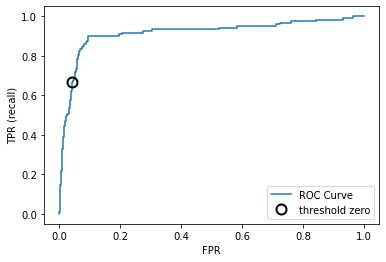

In [86]:
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")


# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
 label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


In [94]:
thresholds==0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [92]:
np.abs(thresholds[:5])

array([2.4675732 , 1.4675732 , 1.44543522, 1.3883083 , 1.36399692])

In [93]:
np.argmin(thresholds[:5])

4

For the ROC curve, the ideal curve is close to the top left: you want a classifier that
produces a high recall while keeping a low false positive rate. Compared to the default
threshold of 0, the curve shows that we can achieve a significantly higher recall
(around 0.9) while only increasing the FPR slightly.

As for the precision-recall curve, we often want to summarize the ROC curve using a
single number, the area under the curve (this is commonly just referred to as the
AUC, and it is understood that the curve in question is the ROC curve). We can com‐
pute the area under the ROC curve using the roc_auc_score function

In [95]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))


AUC for Random Forest: 0.937
AUC for SVC: 0.916


This makes AUC a
much better metric for imbalanced classification problems than accuracy. The AUC
can be interpreted as evaluating the ranking of positive samples. It’s equivalent to the
probability that a randomly picked point of the positive class will have a higher score
according to the classifier than a randomly picked point from the negative class.



perfect AUC of 1 means that all positive points have a higher score than all negative
points. For classification problems with imbalanced classes, using AUC for model
selection is often much more meaningful than using accuracy.

In [ ]:
#old classifier 

gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


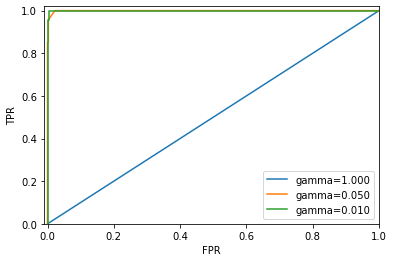

In [96]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, y, random_state=0)
plt.figure()
for gamma in [1, 0.05, 0.01]:
 svc = SVC(gamma=gamma).fit(X_train, y_train)
 accuracy = svc.score(X_test, y_test)
 auc = roc_auc_score(y_test, svc.decision_function(X_test))
 #auc = average_precision_score(y_test, svc.decision_function(X_test))
 fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
 print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(
 gamma, accuracy, auc))
 plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

The accuracy of all three settings of gamma is the same, 90%. This might be the same
as chance performance, or it might not. Looking at the AUC and the corresponding
curve, however, we see a clear distinction between the three models.

For this reason, we highly recommend using AUC when evaluating models on imbal‐
anced data. Keep in mind that AUC does not make use of the default threshold,
though, so adjusting the decision threshold might be necessary to obtain useful classi‐
fication results from a model with a high AUC

gamma = 1.00 accuracy = 0.90 AUC = 0.10
gamma = 0.05 accuracy = 0.90 AUC = 0.99
gamma = 0.01 accuracy = 0.90 AUC = 1.00


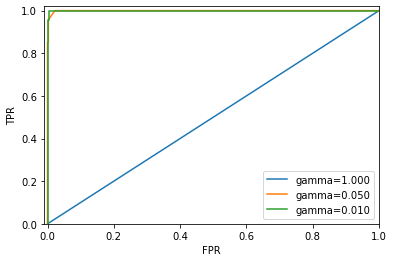

In [97]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, y, random_state=0)
plt.figure()
for gamma in [1, 0.05, 0.01]:
 svc = SVC(gamma=gamma).fit(X_train, y_train)
 accuracy = svc.score(X_test, y_test)
 #auc = roc_auc_score(y_test, svc.decision_function(X_test))
 auc = average_precision_score(y_test, svc.decision_function(X_test))
 fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
 print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(
 gamma, accuracy, auc))
 plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

# Metrics for Multiclass Classification


all metrics for
multiclass classification are derived from binary classification metrics, but averagedover all classes
Accuracy for multiclass classification is again defined as the fraction
of correctly classified examples.

Let’s apply these two detailed evaluation
methods on the task of classifying the 10 different handwritten digits in the digits
dataset:

In [98]:
from sklearn.metrics import accuracy_score
\
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, digits.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)


print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



The most commonly used metric for imbalanced datasets in the multiclass setting is
the multiclass version of the f-score. The idea behind the multiclass f-score is to com‐
pute one binary f-score per class, with that class being the positive class and the other
classes making up the negative classes. Then, these per-class f-scores are averaged
using one of the following strategies:
    
• "macro" averaging computes the unweighted per-class f-scores. This gives equal
weight to all classes, no matter what their size is.

• "weighted" averaging computes the mean of the per-class f-scores, weighted by
their support. This is what is reported in the classification report.

• "micro" averaging computes the total number of false positives, false negatives,
and true positives over all classes, and then computes precision, recall, and fscore using these counts.

In [100]:
print("Micro average f1 score: {:.3f}".format
 (f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format
 (f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.951
Macro average f1 score: 0.952


# Regression Metrics

 in most applications we’ve seen, using the default R
2 used in the score
method of all regressors is enough. Sometimes business decisions are made on the
basis of mean squared error or mean absolute error, which might give incentive to
tune models using these metrics. 

In general, though, we have found R
2
 to be a more
intuitive metric to evaluate regression models.


# different way of using metrics in classification

In [101]:
# default scoring for classification is accuracy
print("Default scoring: {}".format(
 cross_val_score(SVC(), digits.data, digits.target == 9)))

# providing scoring="accuracy" doesn't change the results
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9,
 scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))

roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9,
 scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))


Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [104]:
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, digits.target == 9, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)


print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)

print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))

print("Test set AUC: {:.3f}".format(
 roc_auc_score(y_test, grid.decision_function(X_test))))

print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [105]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")


grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
 roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000


The most important values for the scoring parameter for classification are accuracy
(the default); roc_auc for the area under the ROC curve; average_precision for the
area under the precision-recall curve; f1, f1_macro, f1_micro, and f1_weighted for
the binary f1
-score and the different weighted variants. 


For regression, the most com‐
monly used values are r2 for the R
2
 score, mean_squared_error for mean squared
error, and mean_absolute_error for mean absolute error|

In [106]:
from sklearn.metrics.scorer import SCORERS
print("Available scorers:\n{}".format(sorted(SCORERS.keys())))


ModuleNotFoundError: No module named 'sklearn.metrics.scorer'